In [1]:
from IPython.display import Image
Image(url= "https://media.istockphoto.com/id/167411383/photo/painting-of-steamer-ship-in-ocean-waters.jpg?s=612x612&w=0&k=20&c=9q2nGwWvn_ZXpDNptItNiJIDG5ofMYaqGkK-OY8xsUQ=")

In [2]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

<div style="background-color:#e6f7ff; padding:10px; border-radius:5px; margin-bottom:10px;">
    <h2 style="color:#004d99; margin-bottom: 10px;">Predict survival on the Titanic</h2>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Defining the problem statement</h3></li>
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Collecting the data</h3></li>
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Exploratory data analysis</h3></li>
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Feature engineering</h3></li>
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Modelling</h3></li>
        <li style="margin-bottom: 5px;"><h3 style="color:#0066cc; margin-top: 0;">&bull; Testing</h3></li>
    </ul>
</div>


<div style="background-color:#e6f7ff; padding:10px; border-radius:5px; margin-bottom:10px;">
    <h2 style="color:#004d99;">Problem Definition</h2>
    <p style="color:#0066cc; margin-bottom: 10px;">The problem is to predict whether a passenger survived the Titanic disaster based on various features such as: Passenger class, Age, Sex, Number of siblings/spouses aboard (SibSp), Number of parents/children aboard (Parch), Fare paid, Cabin, and Port of embarkation.</p>
    <p style="color:#0066cc;">This is a classic binary classification problem, where the target variable (Survived) has two possible outcomes:</p>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="margin-bottom: 5px;"><span style="color:#0066cc;">0: Did not survive</span></li>
        <li style="margin-bottom: 5px;"><span style="color:#0066cc;">1: Survived</span></li>
    </ul>
</div>


#### Here's the data dictionary for the Titanic dataset

| Variable   | Description                                                                                        |
|------------|----------------------------------------------------------------------------------------------------|
| PassengerId| Each passenger is assigned a unique identifier.                                                    |
| Survived   | Indicates whether the passenger survived the Titanic disaster or not.                                |
|            | - 0: No (did not survive)                                                                           |
|            | - 1: Yes (survived)                                                                                  |
| Pclass     | Represents the ticket class, reflecting the socio-economic status of the passenger.                 |
|            | - 1: 1st class                                                                                       |
|            | - 2: 2nd class                                                                                       |
|            | - 3: 3rd class                                                                                       |
| Name       | The name of the passenger.                                                                          |
| Sex        | Indicates the gender of the passenger, categorized as male or female.                                |
| Age        | The age of the passenger. Some entries may be missing, indicated by NaN.                             |
| SibSp      | The number of siblings or spouses the passenger had aboard the Titanic.                              |
| Parch      | The number of parents or children the passenger had aboard the Titanic.                              |
| Ticket     | The ticket number.                                                                                   |
| Fare       | The fare paid by the passenger for the ticket.                                                       |
| Cabin      | The cabin number where the passenger stayed. Some entries may be missing.                             |
| Embarked   | Indicates the port of embarkation for the passenger.                                                  |
|            | - C: Cherbourg                                                                                       |
|            | - Q: Queenstown                                                                                      |
|            | - S: Southampton                                                                                    |


In [3]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

Loading train, test dataset using Pandas

In [4]:
train_done = pd.read_csv('train.csv')
test_done = pd.read_csv('test.csv')

In [5]:
print("Train features shape : ", train_done.shape)
print("Test features shape  : ", test_done.shape)

Train features shape :  (891, 12)
Test features shape  :  (418, 11)


In [6]:
train_done.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(train_done.info())
train_done.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(test_done.info())
test_done.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##### We'll remove the PassengerId column since it's useless and we'll also remove the Name column and the Ticket column

In [9]:
train = train_done.drop(["PassengerId", "Ticket", "Name"], axis=1)
test = test_done.drop(["PassengerId", "Ticket", "Name"], axis=1)

print(train.head())
print("-----------------------------------------------------------------------")
print(test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S
-----------------------------------------------------------------------
   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S


In [10]:
train.isna().sum() # 'Age', 'Cabin' & 'Embarked' have NaN values for training data

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Missing Values in the Dataset

- **Age:** 177 missing values. This significant number of missing entries in the Age column might impact any analysis or predictive modeling that depends heavily on age. Methods such as imputation (replacing missing values with the mean, median, mode, or using other algorithms) might be necessary to handle these gaps.

- **Cabin:** 687 missing values, which is a substantial portion of the data. This high number of missing values in the Cabin column could indicate that cabin information was not well recorded or is missing for many passengers. This missing data might be critical if cabin location is a significant factor in survival rates, and it poses challenges for using this variable in predictive models without substantial data imputation or feature engineering.

- **Embarked:** 2 missing values, indicating that almost all passengers have recorded embarkation points, with only a very few missing.


In [11]:
df_train_list = [train_done.Survived, train_done.Pclass, train_done.Sex, train_done.SibSp, train_done.Parch, train_done.Embarked]

print("===========================================")
for i in df_train_list:
    print(i.value_counts())
    print("===========================================")

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
test_done.isna().sum() # 'Age', 'Cabin' have NaN values for testing data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Missing Values in the Dataset

- **Age:** 86 missing values, similar to the training set, indicating a significant number of passengers for whom age is not recorded. This needs to be addressed, possibly through imputation, for analyses or models that use age.

- **Fare:** 1 missing value, which is minimal but important as fare might correlate with other variables like passenger class or survival probability. This missing value should be filled for accurate modeling.

- **Cabin:** 327 missing values, again a substantial portion similar to the training set. This large number of missing cabin details represents a challenge for any analysis that considers cabin data, requiring potentially significant data imputation or a decision to drop or alter this feature for model training.


#### From the above info, we can see that in the Embarked list the number of "S" designation is a lot more than any other. We can then replace all null with S.

In [13]:
# we'll look at the training set
print(train.describe())
print(train.isna().sum())

# we'll look at the testing set
print(test.describe())
print(test.isna().sum())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     

It's clear that the Cabin column in both the training and testing set is mostly made of Nan values, so it's nearly pointless to keep that column(if we wish to drop Nan values in that column we'll drop a large portion of the rows, and replacing the Nan values won't be an efficient strategy since they are many, It's almost like creating new Data!)

In [14]:
train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

print(train.head())
print(test.head())

##################################################

print(train.isna().sum())
print(test.isna().sum())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


We can see that there are only 2 Nan rows in Embarked which is a very slight amount compared to 891 rows of the training set, so removing these rows won't be a problem or we can also replace with S (most occuring), The only thing to consider here is the Age column in bith the training and testing sets, Later on we'll see how we handle those missing values

In [15]:
train = train.dropna(subset=["Embarked"])

In [16]:
print(train.head())
print(test.head())

##################################################

print(train.isna().sum())
print(test.isna().sum())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [17]:
print(test[test["Fare"].isna()])

     Pclass   Sex   Age  SibSp  Parch  Fare Embarked
152       3  male  60.5      0      0   NaN        S


###### If we know that this guy had a third class ticket, we could easily fill the fare value with the mean of the Fare of third class passengers.

In [18]:
test.iloc[152, 5] = np.mean(test[test["Pclass"]==3]["Fare"])

print(test.iloc[152, :])

Pclass              3
Sex              male
Age              60.5
SibSp               0
Parch               0
Fare        12.459678
Embarked            S
Name: 152, dtype: object


In [19]:
print(train.isna().sum())
print(test.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


I am not going to use mean and median imputation for imputing the age column values , instead i will use different appraoch which is as follows: 

## Handling Missing Age Values

### 1. Data Preparation:
#### Convert categorical variable 'Sex' into binary values (0 for female, 1 for male).
#### Apply one-hot encoding to the 'Embarked' column.

### 2. Random Forest Regression:
#### Instead of imputing missing ages with a single value like mean or median, a Random Forest Regressor model is trained on the non-missing data.
#### Features used for prediction are all columns except 'Age', with 'Age' as the target variable.

### 3. Model Training:
#### Train the Random Forest Regressor with 100 estimators, ensuring robust prediction based on available data.

### 4. Prediction:
#### After training the model, use it to predict missing ages for rows where 'Age' is NaN.

### 5. Filling Missing Values:
#### Fill missing ages with predicted values obtained from the Random Forest Regressor model.

## Advantages Over Mean or Median Imputation:
#### Captures complex relationships between 'Age' and other features in the dataset.
#### Captures more nuanced patterns and variations in age, resulting in more accurate imputations.
#### Avoids biasing the data with a single value and provides a more realistic distribution of age values.

#### the only thing left to handle is the Age column

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# before using the model we'll have to convert Sex column to binary values as well as hot encode the embarked column!
train["Sex"] = [1 if i=="male" else 0 for i in train["Sex"]]
test["Sex"] = [1 if i=="male" else 0 for i in test["Sex"]]

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.head())
print(test.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0       3    1  34.5      0      0   7.8292           0           1   
1       3    0  47.0      1      0   7.0000           0           0   
2       2    1  62.0      0      0   9.6875           0           1   
3       3    1  27.0      0      0   8.6625           0           0   
4       3    0  22.0      1      1  12.2875           0       

In [21]:
# Random Forest Regression
def fill_missing_ages(df):
    X = df.drop(['Age'], axis=1)
    y = df['Age']

    X_missing = X[y.isna()]
    y_missing = y[y.isna()]
    
    X_not_missing = X[~y.isna()]
    y_not_missing = y[~y.isna()]

    # Train a regression model on the non-missing data
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_not_missing, y_not_missing)

    # Predict the missing ages
    predictions = model.predict(X_missing)

    # Fill the missing ages with the predictions
    df.loc[y.isna(), 'Age'] = predictions

    return df

# Fill missing values in the 'Age' column
train = fill_missing_ages(train)
test = fill_missing_ages(test)

# Verify if there are any remaining missing values
print("Missing values in training set:")
print(train.isna().sum())
print("\nMissing values in testing set:")
print(test.isna().sum())

Missing values in training set:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Missing values in testing set:
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


###### Missing values in the Age column have been replaced successfully and now i will proceed with the visualization part.

### An Important Note
I could have easily converted the Pclass column into a categorical column then turn it into a dummy column like the Embarked column, But I preferred to keep it as a numerical one due to the ORDINAL nature of this column.

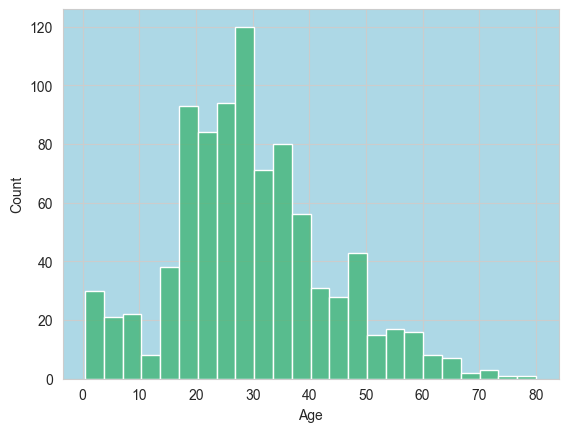

In [22]:
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Plot histogram with Seaborn
sns.set_style("whitegrid")  # Setting background style to white grid
sns.histplot(data=train, x="Age", color='mediumseagreen')  # Setting bar color to light green
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()

From this visualisation , the most common ages were from 20 to 40.

<Figure size 640x480 with 0 Axes>

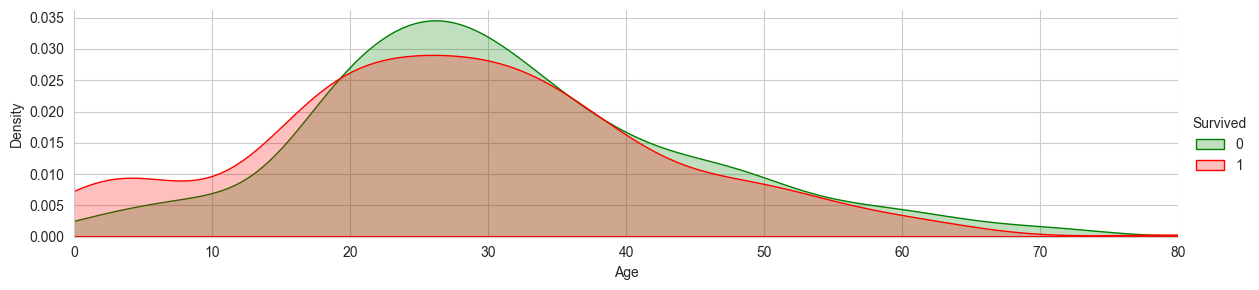

<Figure size 640x480 with 0 Axes>

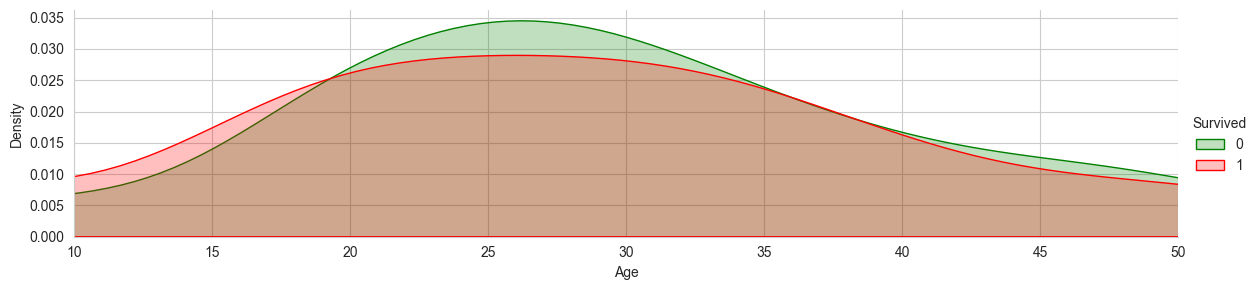

In [23]:
# Define custom colors
palette = {0: "green", 1: "red"}

# Set background color to light blue
plt.figure(facecolor='lightblue')

# Create the FacetGrid plot
facet = sns.FacetGrid(train, hue="Survived", aspect=4, palette=palette)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Show the plot with the specified background color
plt.show()

# Create the FacetGrid plot with specified x limits
plt.figure(facecolor='lightblue')
facet = sns.FacetGrid(train, hue="Survived", aspect=4, palette=palette)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(10, 50)

# Show the plot with the specified background color and x limits
plt.show()

Those who were 20 to 30 years old were more dead and more survived.

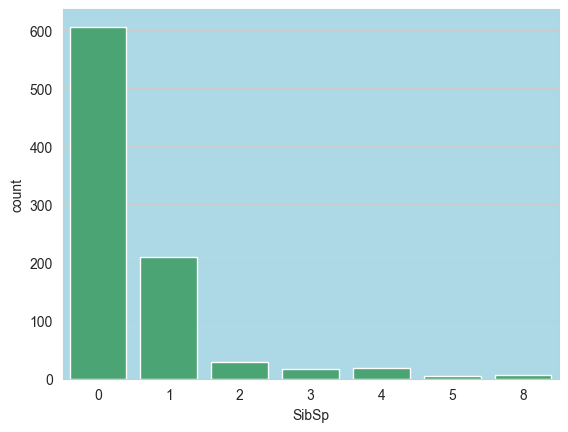

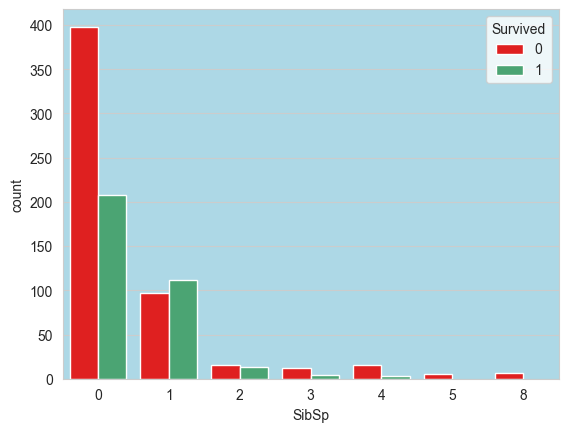

In [24]:
# Suppressing warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Plot countplot with Seaborn
sns.set_style("whitegrid")  # Setting background style to white grid

# Plot countplot for SibSp
sns.countplot(data=train, x="SibSp", color='mediumseagreen')  # Setting bar color to light green
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()

# Plot countplot for SibSp with hue as 'Survived'
sns.set_style("whitegrid")  # Setting background style to white grid
sns.countplot(data=train, x="SibSp", hue="Survived", palette={0: 'red', 1: 'mediumseagreen'})  # Setting bar color to red for 'Not Survived' and light green for 'Survived'
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()


It seems that having one Sibling or Spouse yielded a higher chance of survival than death!, although the probabilities are relatively close, with 2 SibSp it's nearly half-half and a person aboarded without siblings or spouse more likely dead.

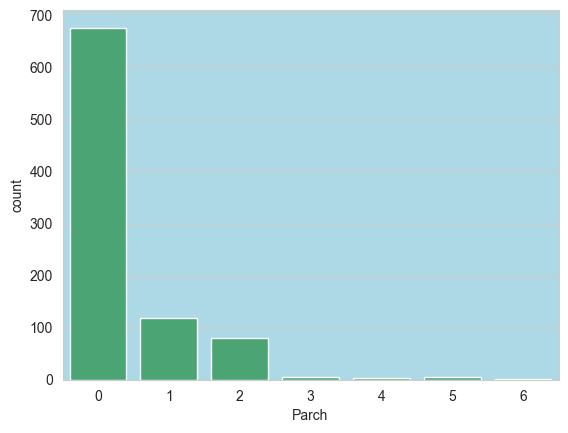

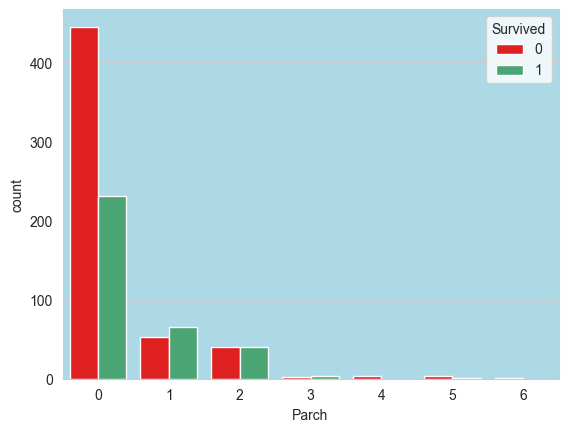

In [25]:
# Suppressing warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Plot countplot with Seaborn
sns.set_style("whitegrid")  # Setting background style to white grid

# Plot countplot for Parch
sns.countplot(data=train, x="Parch", color='mediumseagreen')  # Setting bar color to light green
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()

# Plot countplot for Parch with hue as 'Survived'
sns.set_style("whitegrid")  # Setting background style to white grid
sns.countplot(data=train, x="Parch", hue="Survived", palette={0: 'red', 1: 'mediumseagreen'})  # Setting bar color to red for 'Not Survived' and light green for 'Survived'
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()

Having one Parent or Child yielded a higher chance of survival, while having 2 has a fifty-fifty probability and  a person aboarded alone more likely dead.

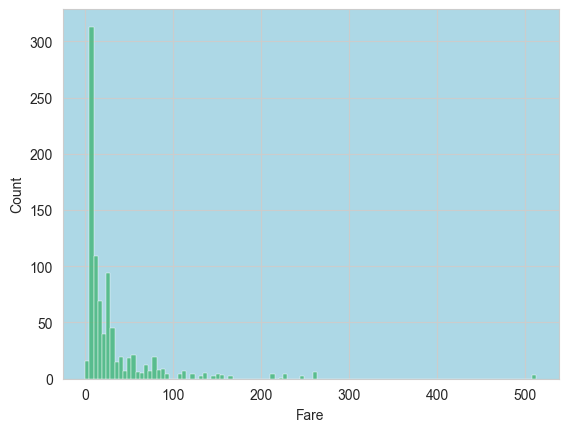

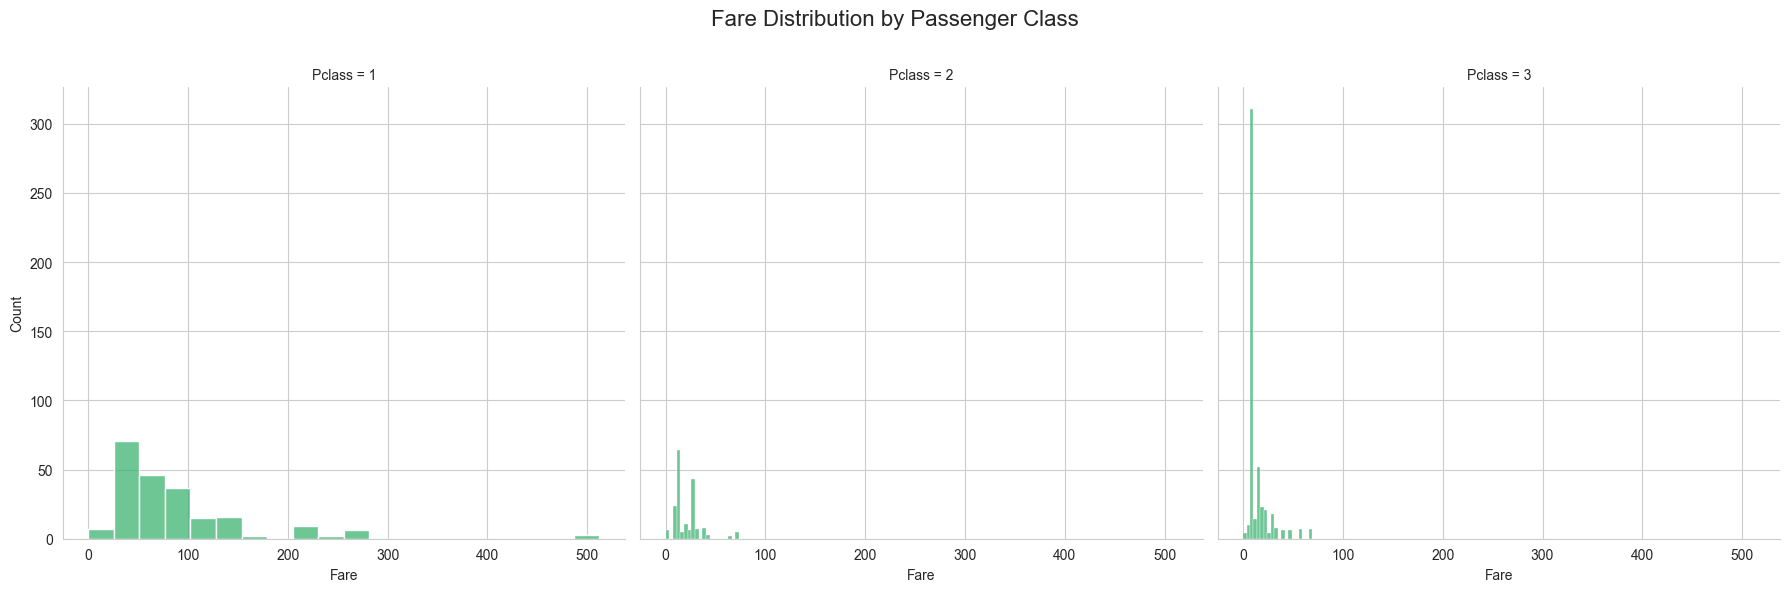

In [26]:
# Suppressing warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Plot histogram with Seaborn
sns.set_style("whitegrid")  # Setting background style to white grid
sns.histplot(data=train, x="Fare", color='mediumseagreen')  # Setting bar color to medium green
plt.gca().set_facecolor('lightblue')  # Setting background color to light blue
plt.show()

# Plotting histogram of fare against passenger class
sns.set_style("whitegrid")  # Setting background style to white grid
g = sns.FacetGrid(train, col="Pclass", height=6)
g.map(sns.histplot, "Fare", color='mediumseagreen', bins=20)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Fare Distribution by Passenger Class', fontsize=16)
plt.show()

#### It looks perfectly fine and nothing is odd , lower Fares are extremely common since most of those on the Titanic were 3rd class followed by 2nd class and 1st class.

***Let me check the survival probabilty of those who had a fare of over 500 ( as shown in the Fare Distribution by passenger class plot)***

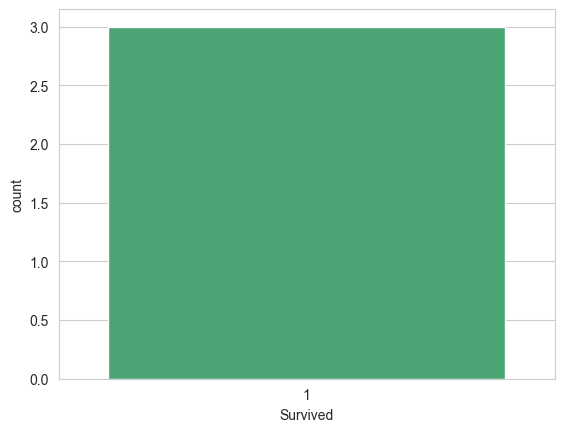

In [27]:
here_comes_the_money = train[train["Fare"]>=500]

sns.countplot(data=here_comes_the_money, x="Survived" , color='mediumseagreen')
plt.show()

***So here , three had a fare of over 500 and three of them survived.***

**Let's also check for those who had a fare of over 200.**

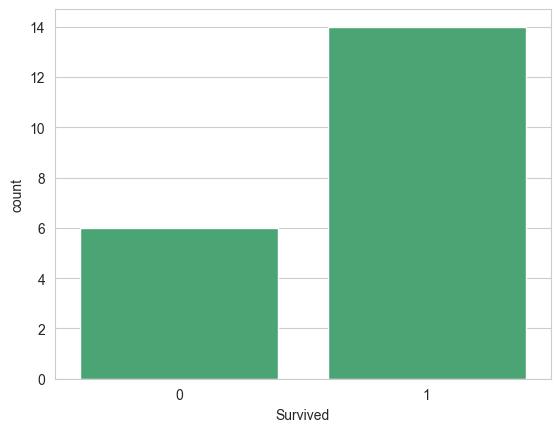

In [28]:
over_200 = train[train["Fare"]>=200]

sns.countplot(data=over_200, x="Survived", color = "mediumseagreen")
plt.show()

***Here , 14 out of 20 survived and that a 70 percent survival rate if you paid a fare of over 200.***

In [29]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [30]:
#Training Testing and Spliting the model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [31]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7902621722846442


In [32]:
#Confusion Matrix

confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[136  24]
 [ 32  75]]


In [33]:
#Using Support Vector
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(Y_test,pred_y))

Accuracy Score : 0.651685393258427


In [34]:
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[145  15]
 [ 78  29]]
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       160
           1       0.66      0.27      0.38       107

    accuracy                           0.65       267
   macro avg       0.65      0.59      0.57       267
weighted avg       0.65      0.65      0.61       267



In [35]:
#Using KNN Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7228464419475655


In [36]:
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  33]
 [ 41  66]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       160
           1       0.67      0.62      0.64       107

    accuracy                           0.72       267
   macro avg       0.71      0.71      0.71       267
weighted avg       0.72      0.72      0.72       267



In [37]:
#Using GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7827715355805244


In [38]:
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[131  29]
 [ 29  78]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.73      0.73      0.73       107

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



In [39]:
#Using Decision Tree
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7752808988764045


In [40]:
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[135  25]
 [ 35  72]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       160
           1       0.74      0.67      0.71       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



In [41]:
# Collect results
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision': precision_score(Y_test, Y_pred),
        'Recall': recall_score(Y_test, Y_pred)
    }

# Prepare results for tabulate
table_data = []
for model_name, metrics in results.items():
    table_data.append([
        model_name,
        f"\033[92m{metrics['Accuracy']:.2f}\033[0m",   # Green color for Accuracy
        f"\033[94m{metrics['Precision']:.2f}\033[0m", # Blue color for Precision
        f"\033[93m{metrics['Recall']:.2f}\033[0m"     # Yellow color for Recall
    ])

# Print results in a tabular format
print(tabulate(table_data, headers=['Model', 'Accuracy', 'Precision', 'Recall'], tablefmt='fancy_grid'))

NameError: name 'models' is not defined

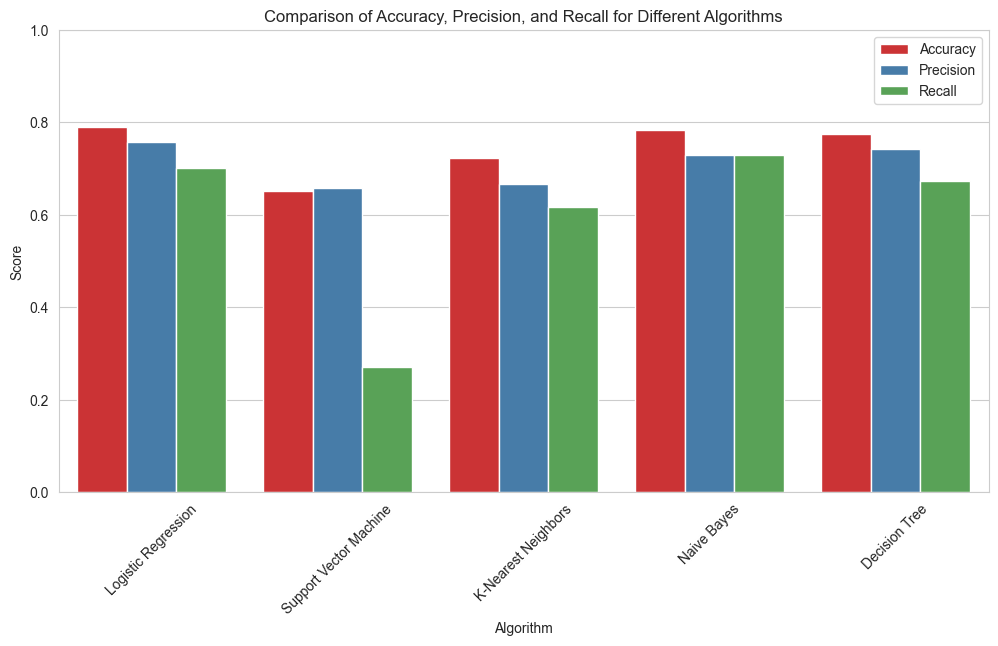

In [ ]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=7)
}

# Collect results
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision': precision_score(Y_test, Y_pred),
        'Recall': recall_score(Y_test, Y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Algorithm', y='Score', hue='Metric', palette='Set1')
plt.title('Comparison of Accuracy, Precision, and Recall for Different Algorithms')
plt.ylim(0, 1)  # Set y-limit to reflect that Precision and Recall are in the range [0, 1]
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Save the trained Naive Bayes model
save_model_path = 'models/NaiveBayes_model.pkl'
save_model = True  # Set to True if you want to save the model

if save_model:
    # Extract directory path
    directory = os.path.dirname(save_model_path)
    
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    
    with open(save_model_path, 'wb') as out_file:
        pickle.dump(nb_model, out_file)
    print(f"Naive Bayes model saved in:\n'{save_model_path}'")
else:
    print('According to the configuration, the model is NOT saved')

Naive Bayes model saved in:
'models/NaiveBayes_model.pkl'
